In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import os
import seaborn as sns

output_dir = "../../../assets/tesis/intervensionismo_estatal/serie_completa"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
# Configuración de estilo profesional
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams.update({
    'font.family': 'serif',
    'font.size': 12,
    'axes.titlesize': 16,
    'axes.labelsize': 14,
    'grid.linestyle': '--',
    'lines.linewidth': 2,
    'figure.dpi': 150,
    'savefig.bbox': 'tight'
})

def estad_post(s):
    mean = s.loc[1956:1982].mean()
    g82  = (s.loc[1982] - s.loc[1956]) / s.loc[1956] * 100
    return f"Post (56‑82)\nMean: {mean:.2f}\nΔ82/56: {g82:.1f}%"

def estad_crisis(s):
    mean = s.loc[1952:1955].mean()
    g56  = (s.loc[1956] - s.loc[1952]) / s.loc[1952] * 100
    return f"Crisis (52‑55)\nMean: {mean:.2f}\nΔ56/52: {g56:.1f}%"

# Conexión a la base de datos y carga de datos de PIB
conn = sqlite3.connect('../../../db/proyectomacro.db')
df_pib = pd.read_sql_query("SELECT * FROM pib_real_gasto", conn)
conn.close()

# Establecer el índice y recortar al periodo 1952-1982
df_pib.set_index('año', inplace=True)
df_pib = df_pib.loc[1952:1982]

# Ajustar la escala del PIB (por ejemplo, dividiendo por 1000)
df_pib["pib_real_base_1990"] /= 1000
# Definir segmentos: Pre crisis (1952-1955) y Post crisis (1956-1982)
df_pre = df_pib.loc[1952:1956]
df_post = df_pib.loc[1956:1982]
df_full = df_pib  # Para usar en anotaciones y cuadros



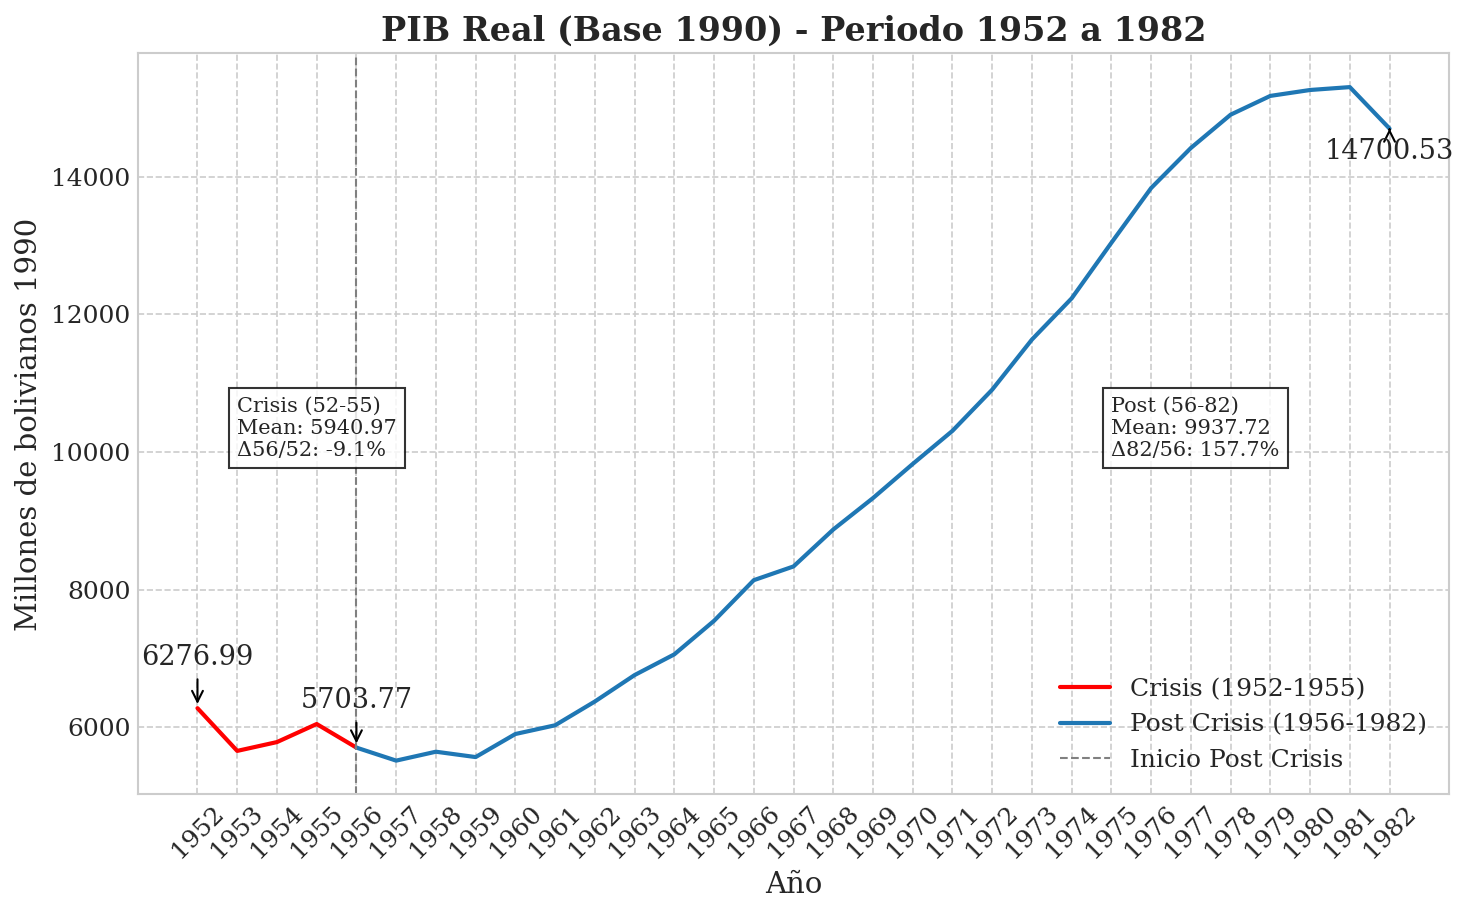

In [4]:
# Crear figura y eje
fig, ax = plt.subplots(figsize=(10,6))

# Graficar el segmento pre crisis en azul y el post crisis en rojo
ax.plot(df_pre.index, df_pre['pib_real_base_1990'], color='red', label='Crisis (1952-1955)')
ax.plot(df_post.index, df_post['pib_real_base_1990'], color='#1f77b4', label='Post Crisis (1956-1982)')

# Línea vertical separadora en 1956
ax.axvline(x=1956, color='gray', linestyle='--', linewidth=1, label='Inicio Post Crisis')

# Agregar anotaciones en años clave
for year in [1952, 1956, 1982]:
    if year in df_full.index:
        value = df_full.loc[year, 'pib_real_base_1990']
        if year == 1982:
            # Para 1982, anotar ligeramente por debajo
            ax.annotate(f"{value:.2f}", xy=(year, value), xytext=(year, value * 0.97),
                        arrowprops=dict(facecolor='black', arrowstyle='->'),
                        fontsize=13, ha='center')
        else:
            # Para los demás, anotar por encima
            ax.annotate(f"{value:.2f}", xy=(year, value), xytext=(year, value * 1.1),
                        arrowprops=dict(facecolor='black', arrowstyle='->'),
                        fontsize=13, ha='center')

# Agregar cuadros de estadísticas descriptivas
ax.text(1953, df_full['pib_real_base_1990'].max() * 0.65, estad_crisis(df_full['pib_real_base_1990']),
        fontsize=10, bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))
ax.text(1975, df_full['pib_real_base_1990'].max() * 0.65, estad_post(df_full['pib_real_base_1990']),
        fontsize=10, bbox=dict(facecolor='white', alpha=0.8, edgecolor='black'))

# Etiquetas, título y leyenda
ax.set_title('PIB Real (Base 1990) - Periodo 1952 a 1982', fontweight='bold')
ax.set_xlabel('Año')
ax.set_ylabel('Millones de bolivianos 1990')
ax.legend()
plt.tight_layout()
plt.xticks(df_pib.index,rotation=45)

# Guardar la gráfica en la carpeta 'tesis'
plt.savefig(os.path.join(output_dir, "pib.png"))
plt.show()